In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    y = x**2

y

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>

In [6]:
dy_dx = tape.gradient(y,x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [8]:
w= tf.Variable(tf.random.normal((4,2)))
w 

<tf.Variable 'Variable:0' shape=(4, 2) dtype=float32, numpy=
array([[-1.191508  , -0.5896302 ],
       [ 0.5521288 ,  0.34842315],
       [ 0.61899793, -1.2313884 ],
       [ 0.60828143, -0.43957108]], dtype=float32)>

In [9]:
b = tf.Variable(tf.ones(2, dtype=tf.float32))
b

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [11]:
x = tf.Variable([[10.0,20.0,30.0,40.0]], dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=(1, 4) dtype=float32, numpy=array([[10., 20., 30., 40.]], dtype=float32)>

In [12]:
with tf.GradientTape(persistent=True) as tape:
    y = tf.matmul(x,w) + b
    loss = tf.reduce_mean(y**2)

    

In [13]:
[dl_dw, dl_db] = tape.gradient(loss, [w,b])

In [14]:
dl_dw 

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[  430.2869,  -524.5234],
       [  860.5738, -1049.0468],
       [ 1290.8607, -1573.5701],
       [ 1721.1476, -2098.0935]], dtype=float32)>

In [15]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 43.02869 , -52.452335], dtype=float32)>

In [16]:
layer = tf.keras.layers.Dense(2, activation='relu')

x = tf.constant([[10.0, 20., 30.]])

In [17]:
with tf.GradientTape() as tape:
    y = layer(x)
    loss = tf.reduce_sum(y**2)

grad = tape.gradient(loss, layer.trainable_variables)

In [18]:
grad

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 777.31287,  555.58746],
        [1554.6257 , 1111.1749 ],
        [2331.9385 , 1666.7625 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([77.731285, 55.558746], dtype=float32)>]

# Simple Linear Regression

In [19]:
W_true =  2
b_true = 0.5 

In [22]:
x= np.linspace(0,3,100) 
y=W_true *x + b_true + np.random.randn(*x.shape) * 0.5


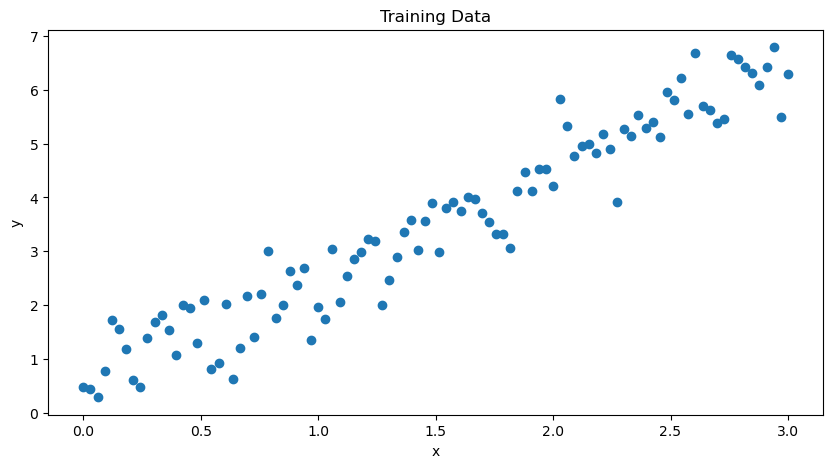

In [23]:
plt.figure(figsize=(10,5))

plt.scatter(x,y)

plt.xlabel('x')
plt.ylabel('y')

plt.title('Training Data')

plt.show()


In [24]:
class LinearModel():
    def __init__(self):
        self.weight =  tf.Variable(np.random.randn(), name='W')
        self.bias = tf.Variable(np.random.randn(), name='b')

    def __call__(self,x):
        return self.weight * x + self.bias

In [25]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [26]:
def train(linear_model, x, y, lr=0.01):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        current_loss = loss(y, y_pred)
    dW, db = tape.gradient(current_loss, [linear_model.weight, linear_model.bias])
    linear_model.weight.assign_sub(lr * dW)
    linear_model.bias.assign_sub(lr * db)

In [27]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100

lr=0.15



In [28]:
for epoch in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    current_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, weights[-1], biases[-1], current_loss))

Epoch  0: W=0.50 b=0.17, loss=8.60098
Epoch  1: W=2.00 b=0.94, loss=0.45189
Epoch  2: W=1.80 b=0.81, loss=0.27839
Epoch  3: W=1.84 b=0.80, loss=0.27154
Epoch  4: W=1.84 b=0.78, loss=0.26854
Epoch  5: W=1.85 b=0.77, loss=0.26596
Epoch  6: W=1.86 b=0.75, loss=0.26368
Epoch  7: W=1.87 b=0.73, loss=0.26167
Epoch  8: W=1.88 b=0.72, loss=0.25989
Epoch  9: W=1.89 b=0.71, loss=0.25832
Epoch 10: W=1.89 b=0.69, loss=0.25693
Epoch 11: W=1.90 b=0.68, loss=0.25570
Epoch 12: W=1.91 b=0.67, loss=0.25462
Epoch 13: W=1.91 b=0.66, loss=0.25366
Epoch 14: W=1.92 b=0.65, loss=0.25282
Epoch 15: W=1.92 b=0.64, loss=0.25207
Epoch 16: W=1.93 b=0.63, loss=0.25141
Epoch 17: W=1.93 b=0.62, loss=0.25083
Epoch 18: W=1.94 b=0.61, loss=0.25032
Epoch 19: W=1.94 b=0.61, loss=0.24986
Epoch 20: W=1.94 b=0.60, loss=0.24946
Epoch 21: W=1.95 b=0.59, loss=0.24911
Epoch 22: W=1.95 b=0.59, loss=0.24880
Epoch 23: W=1.95 b=0.58, loss=0.24852
Epoch 24: W=1.96 b=0.57, loss=0.24827
Epoch 25: W=1.96 b=0.57, loss=0.24806
Epoch 26: W=

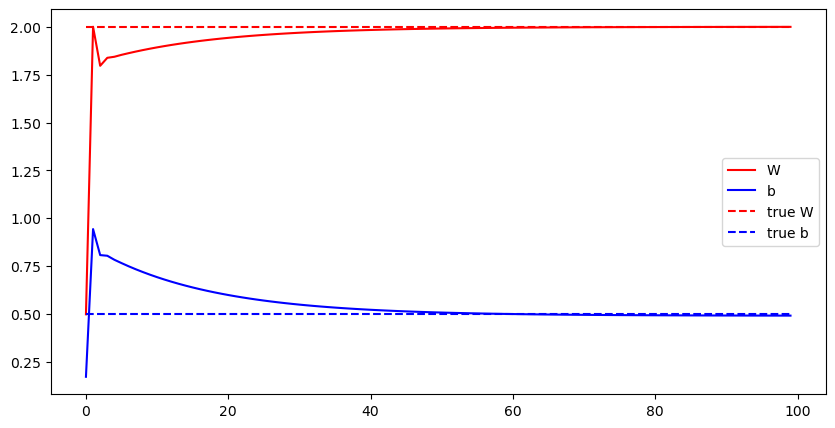

In [29]:
plt.figure(figsize=(10,5))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

In [30]:
linear_model.weight.numpy(), linear_model.bias.numpy()


(2.0008564, 0.49093333)

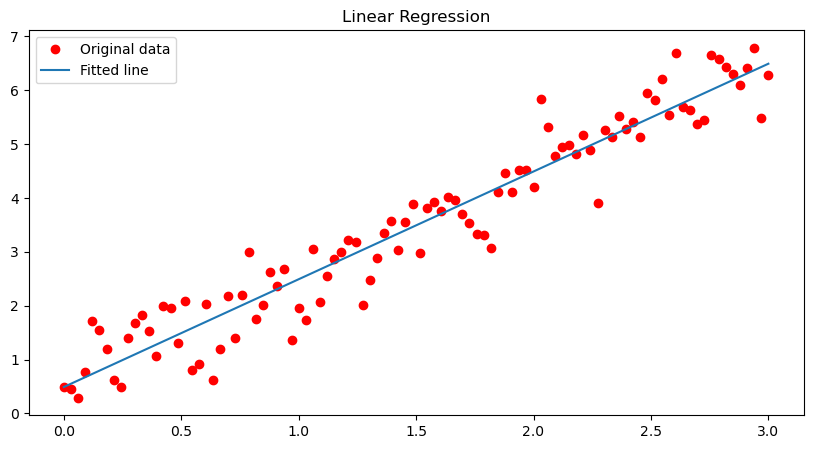

In [32]:
plt.figure(figsize=(10,5))
plt.plot(x,y, 'ro', label='Original data')
plt.plot(x, linear_model(x), label='Fitted line')

plt.title('Linear Regression')
plt.legend()
plt.show()

# Another Implementation without HandCrafting Weights and Biases


In [35]:
from tensorflow import keras
from tensorflow.keras import layers


In [36]:
def build_single_layer_model():
    model= keras.Sequential()
    model.add(layers.Dense(32, input_shape=(1,), activation='sigmoid'))

    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return model

    

In [37]:
model = build_single_layer_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                64        
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [40]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
num_epochs = 100

training_history = model.fit(x_train, y_train, ephocs=num_epochs, validation_split=0.2, verbose=True)

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.plot(training_history.history['mae'], label='loss')
plt.plot(training_history.history['val_mae'], label='val_loss')

plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train'], 'val')

plt.subplot(1,2,2)

plt.plot(training_history.history['loss'], label='loss')
plt.plot(training_history.history['val_loss'], label='val_loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], 'val')


In [41]:
!rm -rf seq_logs
!ls -ls 

total 224
224 -rw-r--r--  1 sulavdahal  staff  112994 Feb 17 16:08 variables.ipynb


In [42]:
import os 
import datetime

In [ ]:
logdir = os.path.join('seq_logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [ ]:
training_history = model.fit(x_train, y_train, ephocs=num_epochs, validation_split=0.2, verbose=True, callbacks=[tensorboard_callback])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir seq_logs --port 6050